# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

tag = 'mutual_information'

eta_homeo = 0.02

homeo_methods = ['HEH', 'None']
nb_quant = 128
nb_quant = 256
C = 5.
alpha_homeo = 0.0

homeo_methods = ['HAP', 'None']
alpha_homeo = 1.

n_iter = 2**13 + 1

record_num_batches = 2**12
N_show = 120
max_patches = 10
seed = 42
np.random.seed(seed)

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=n_iter, 
            eta_homeo=eta_homeo, alpha_homeo=alpha_homeo, 
            C=C, nb_quant=nb_quant, P_cum=None, verbose=verbose)

from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname=tag)

Extracting data..No cache found data_cache/mutual_information_data: Extracting data... Extracting data..Photo2018-01-18_0440462510.jpg, Photo2018-01-18_0309392473.jpg, Photo2018-01-18_0343102547.jpg, Photo2018-02-18_0911262631 square.jpg, Photo2018-01-18_0327052545.jpg, Photo2018-01-18_0440352508.jpg, Photo2018-01-18_0230432458.jpg, Photo2018-01-18_0316462527.jpg, Photo2018-01-18_0553172551.jpg, Photo2018-01-18_0423102502.jpg, Photo2018-01-18_0422432500.jpg, Photo2018-01-18_0441022511.jpg, Data is of shape : (262140, 144) - done in 117.03s.
Data is of shape : (262140, 144) - done in 117.88s.


In [4]:
!ls -l {shl.data_cache}/{tag}*
!rm -fr {shl.data_cache}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  301985408 Feb 23 16:01 data_cache/mutual_information_data.npy


In [5]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (262140, 144)
average of patches =  1.4578306989484052e-05  +/-  0.006638689828201611
average energy of data =  0.029647154513547106 +/- 0.03759209103599952


In [6]:
stick = np.arange(shl.n_dictionary)*nb_quant

indx = np.random.permutation(data.shape[0])[:record_num_batches]
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/mutual_information_HAP_dico.pkl: Learning the dictionary with algo = mp 
 Training on 262140 patches
Iteration   1 /   8193 (elapsed time:   3s,   0mn   3s)
Iteration  129 /   8193 (elapsed time:  89s,   1mn  29s)
Iteration  257 /   8193 (elapsed time:  181s,   3mn   1s)
Iteration  385 /   8193 (elapsed time:  294s,   4mn  54s)
Iteration  513 /   8193 (elapsed time:  411s,   6mn  51s)
Iteration  641 /   8193 (elapsed time:  516s,   8mn  36s)
Iteration  769 /   8193 (elapsed time:  618s,  10mn  18s)
Iteration  897 /   8193 (elapsed time:  713s,  11mn  53s)
Iteration  1025 /   8193 (elapsed time:  817s,  13mn  37s)
Iteration  1153 /   8193 (elapsed time:  912s,  15mn  12s)
Iteration  1281 /   8193 (elapsed time:  1019s,  16mn  59s)
Iteration  1409 /   8193 (elapsed time:  1115s,  18mn  35s)
Iteration  1537 /   8193 (elapsed time:  1219s,  20mn  19s)
Iteration  1665 /   8193 (elapsed time:  1316s,  21mn  56s)
Iteration  1793 /   8193 (elapsed time:  1420s,  23mn 

Iteration  8193 /   8193 (elapsed time:  9808s,  163mn  28s)
done (total time:  9809s,  163.5mn)
done in 9809.56s.
size of dictionary = (number of filters, size of imagelets) =  (529, 144)
average of filters =  -0.00013056542549670357 +/- 0.009832422578213445
average energy of filters =  1.0 +/- 8.539934949036291e-17


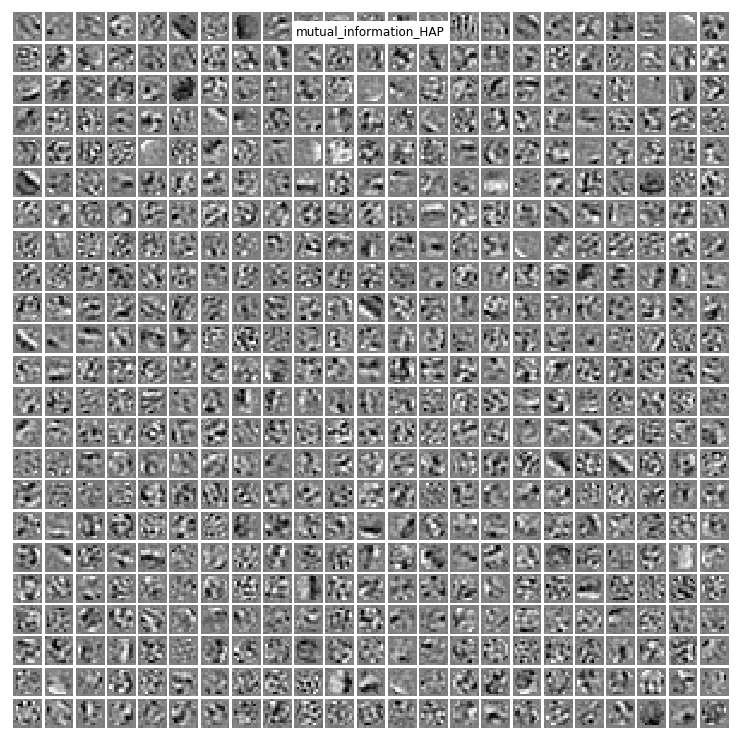

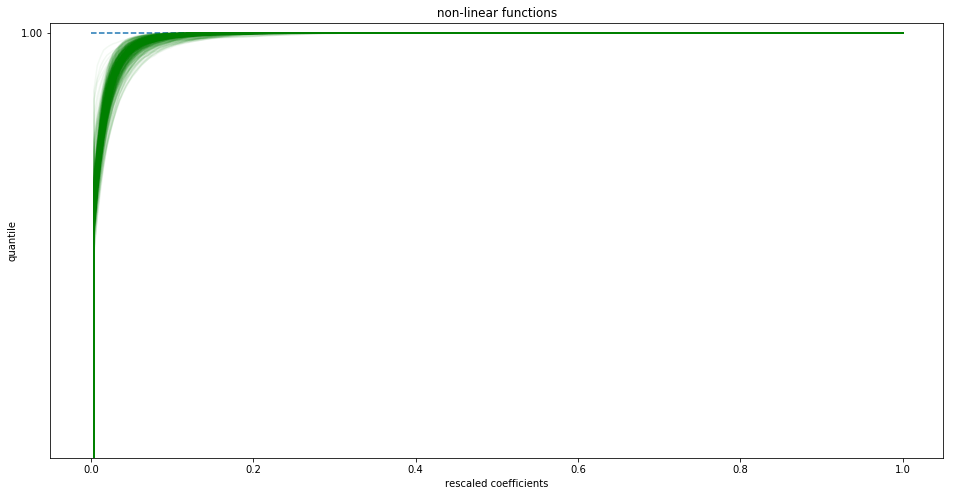

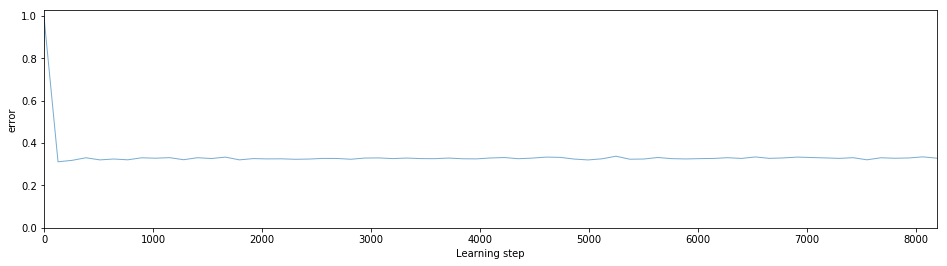

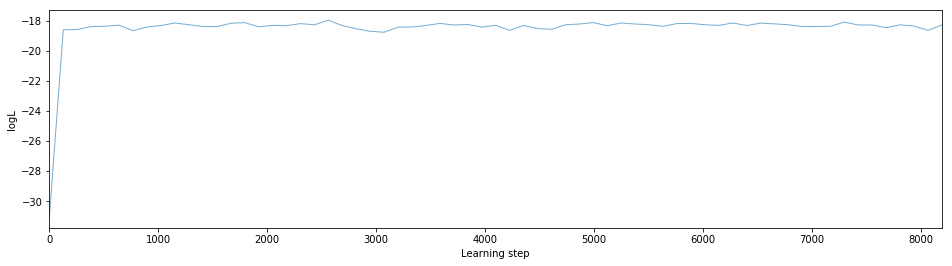

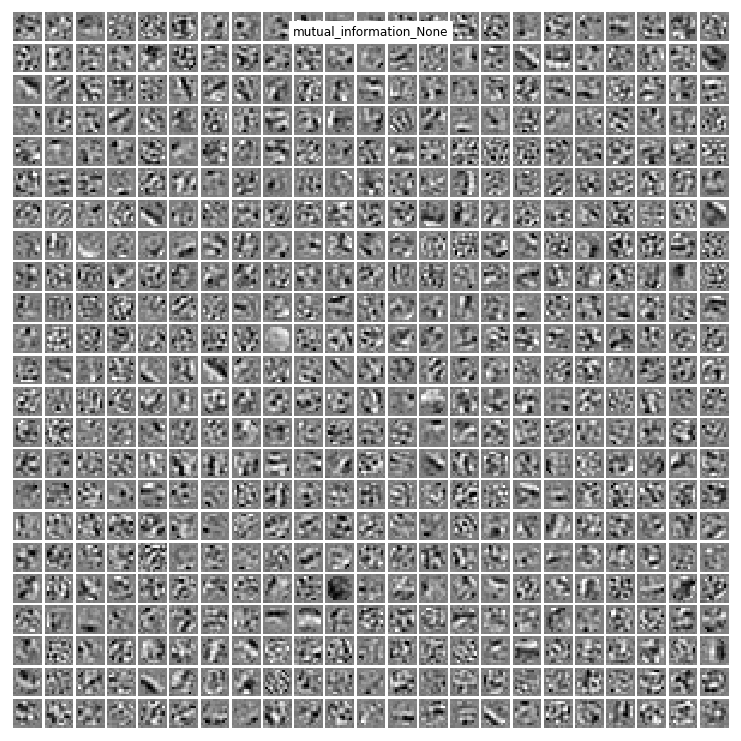

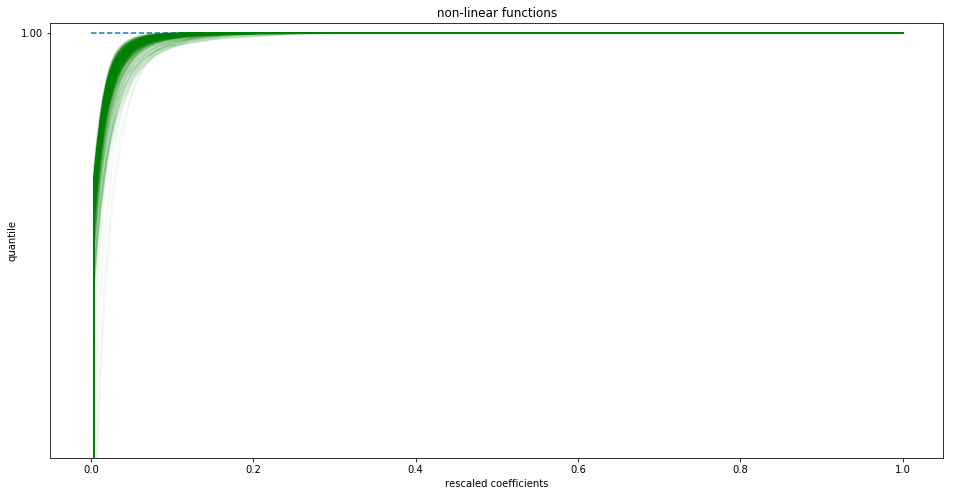

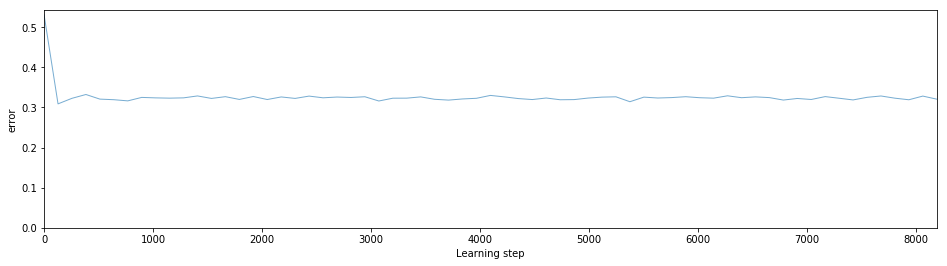

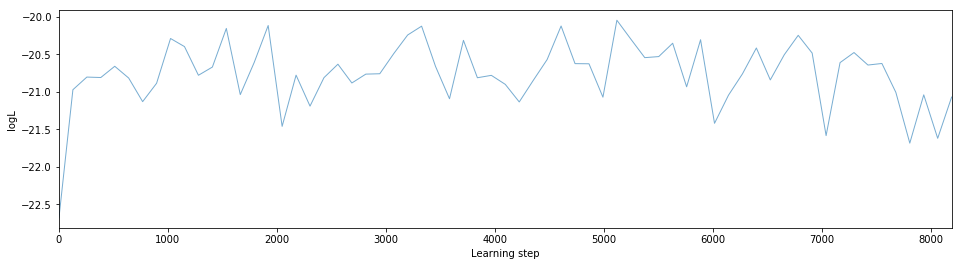

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method, **opts)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())

## theory



In [8]:
from scipy.stats import binom
# define the mean
rho = shl.l0_sparseness / shl.n_dictionary

# draw binomial samples
sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho

In [9]:
print('Sum of non-zero coefficients', sparse_code_binary.sum(), '~=', shl.l0_sparseness*record_num_batches)
print('average non-zeros', np.count_nonzero(sparse_code_binary, axis=0).mean(), '~=', rho*record_num_batches)
print('activation vector', np.count_nonzero(sparse_code_binary, axis=0))

Sum of non-zero coefficients 61350 ~= 61440
average non-zeros 115.97353497164461 ~= 116.14366729678639
activation vector [139 139 116 111 128 101 110 132 116 123 105 117 115 127 114 127 131 124
 127 112 110 142 132 119 120 109 115 116 115 124 118 122 120 102 111 139
 107 116 117 110 120  93 110 107 120 127 113 102 108 117 116 106  96 119
 112 111 109 127 113 113 120 117 112 129 136 111 109 116  96 117 114 125
  99 109 115 122 128 122 116 141 127 130 115 100 101 106 120 112 111 112
 106 116 113 125 116 113 131 114 117 114 110 115 103 132 123 115 123 108
 121 114 112 101 115 115 110 112  96 115  95 127 117 106 117 103 122 115
 123 124 103 120 128 126 120  91 116 113 110 107 152 121 121 122 110 124
 102 128 117 117 112 120 110 111 111 107 127  98 112 130 102 134 124  99
 118 125 114 122 101 115 123 111  98  97 120 102 103 132 114 113 119 130
 121 125 112 109 108 126 113 127 134 115 120 105 120 137 128 111 116 140
 133 115 112 135 125 111 112 108 107 122 119  92 118 118 105 106 113 127
 11

Shape of co-occurrences (4096, 529, 529)
activation vector [[139   2   1 ...   3   8   3]
 [  2 139   7 ...   3   1   5]
 [  1   7 116 ...   7   7   3]
 ...
 [  3   3   7 ... 119   5   1]
 [  8   1   7 ...   5 143   5]
 [  3   5   3 ...   1   5 129]]
marginal activation vector [4.1758 4.2363 3.6597 3.2968 3.8866 3.0491 3.3781 4.0907 3.5406 3.7335
 3.2703 3.603  3.4594 3.8299 3.431  3.862  3.9905 3.775  3.8431 3.3403
 3.2628 4.3629 4.0473 3.6371 3.6465 3.2722 3.4461 3.3497 3.586  3.6427
 3.5652 3.6408 3.5539 3.1474 3.3856 4.1834 3.2023 3.4064 3.414  3.3214
 3.6427 2.8261 3.3025 3.3006 3.5784 3.7958 3.2628 3.1115 3.1569 3.5444
 3.5066 3.1512 2.8752 3.62   3.4442 3.2836 3.2004 3.8639 3.3043 3.414
 3.6257 3.5501 3.3894 3.8715 4.1645 3.4556 3.4291 3.3554 2.9282 3.5085
 3.3667 3.7807 3.0624 3.2836 3.4896 3.6597 3.913  3.6635 3.4972 4.2268
 3.8847 4.0548 3.4575 3.0038 3.0643 3.121  3.6011 3.3781 3.2741 3.3837
 3.1607 3.6238 3.4386 3.707  3.5142 3.4802 3.9792 3.38   3.4216 3.2817
 3.3516 3.516

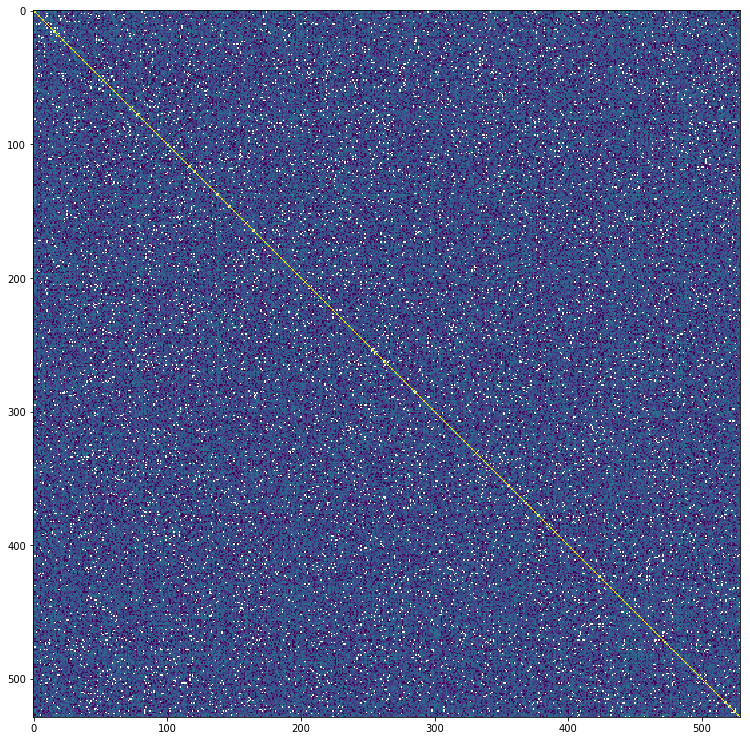

In [10]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
print('Shape of co-occurrences', b_ij.shape)
print('activation vector', np.count_nonzero(b_ij, axis=0))
fig, ax= plt.subplots(figsize=(13, 13))
ax.imshow(np.log(np.count_nonzero(b_ij, axis=0)));
print('marginal activation vector', np.count_nonzero(b_ij, axis=0).mean(axis=-1))

Min-Max -2.0353474011604125e-06 0.0005011316663119671


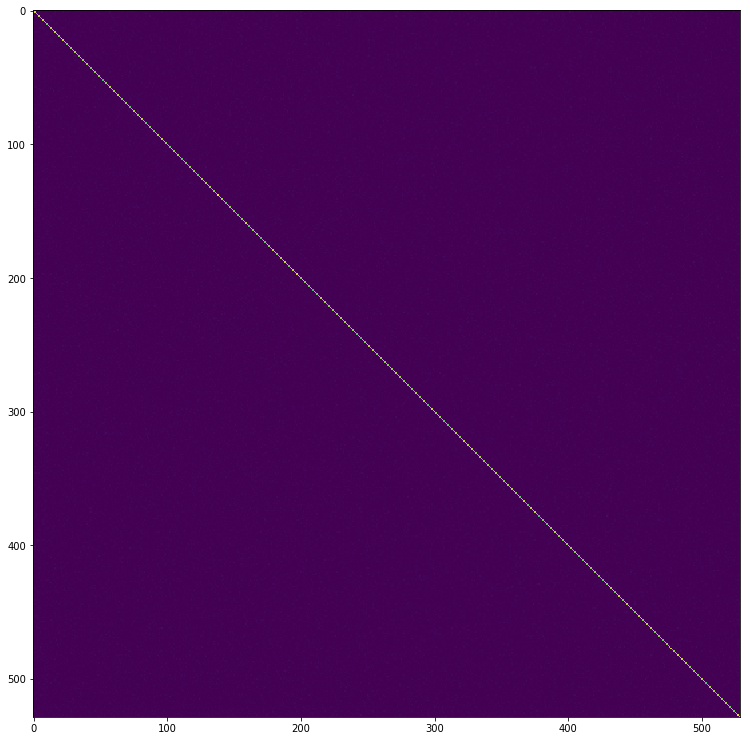

In [11]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
P_ij = 1.*np.count_nonzero(b_ij, axis=0)
P_ij /= P_ij.sum()
P_i = 1.*np.count_nonzero(sparse_code_binary, axis=0)
P_i /= P_i.sum()
fig, ax= plt.subplots(figsize=(13, 13))
MI_ = - (P_ij * np.log( P_i[:, np.newaxis]*P_i[np.newaxis, :] / P_ij  ))
MI_[P_ij==0] = 0
MI_[(P_i[:, np.newaxis]*P_i[np.newaxis, :])==0] = 0
print('Min-Max', MI_.min(), MI_.max())
ax.imshow(MI_);

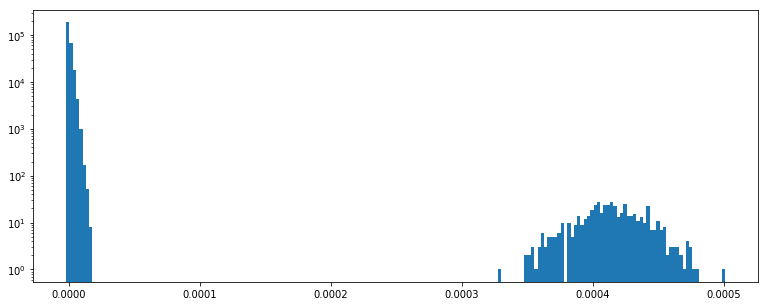

In [12]:
fig, ax= plt.subplots(figsize=(13, 5))
ax.hist(MI_.ravel(), bins=200)
ax.set_yscale('log');

In [13]:
def get_MI(sparse_code):
    b_ij = (sparse_code[:, np.newaxis, :]>0) * (sparse_code[:, :, np.newaxis]>0)
    P_ij = 1.*np.count_nonzero(b_ij, axis=0)
    P_ij /= P_ij.sum()
    P_i = 1.*np.count_nonzero(sparse_code_binary, axis=0)
    P_i /= P_i.sum()
    MI_ = - P_ij * np.log( P_i[:, np.newaxis]*P_i[np.newaxis, :] / P_ij  )
    MI_[P_ij==0] = 0
    MI_[(P_i[:, np.newaxis]*P_i[np.newaxis, :])==0] = 0
    return MI_.sum()
    

In [14]:
for _ in range(10):
    sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho
    MI = get_MI(sparse_code_binary)
    print ('Mutual information for random sample=', MI)

Mutual information for random sample= 0.3065448271767321
Mutual information for random sample= 0.3079558311266548
Mutual information for random sample= 0.3072589702445292
Mutual information for random sample= 0.30844635147054517
Mutual information for random sample= 0.30788366053363847
Mutual information for random sample= 0.3067605431017124
Mutual information for random sample= 0.3055807659007024
Mutual information for random sample= 0.30583879655787394
Mutual information for random sample= 0.30564130177192705
Mutual information for random sample= 0.30344495717209663


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [15]:
from shl_scripts.shl_tools import show_data
def print_stats(data, dictionary, sparse_code):
    print(42*'🐒')

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('average std of codewords = ', sparse_code.std())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())


    plt.matshow(sparse_code[:N_show, :])
    plt.show()
    fig, axs = show_data(data[:max_patches, :])
    plt.show()

    patches = sparse_code @ dictionary
    error = data - patches
    
    print('number of codes, size of reconstructed images = ', patches.shape)

    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(patches[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data**2, axis=1))

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    
    SE = np.sqrt(np.mean(error**2, axis=1))

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())
    
    return SD, SE

In [16]:
homeo_methods

['HAP', 'None']

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.0021168422943965612
average std of codewords =  0.023298576947537435
l0-sparseness of codewords =  0.026687477847353498  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.002718993429959454


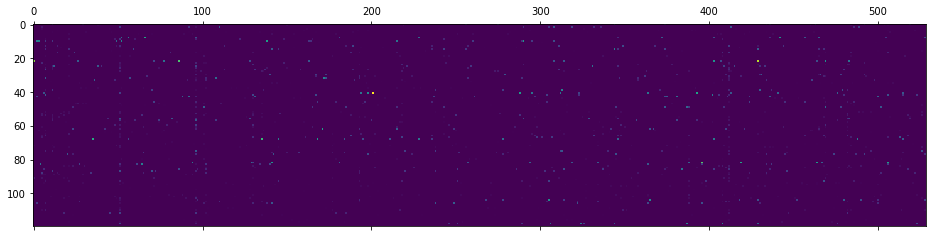

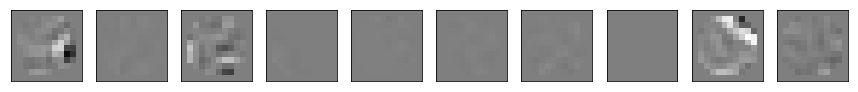

number of codes, size of reconstructed images =  (4096, 144)


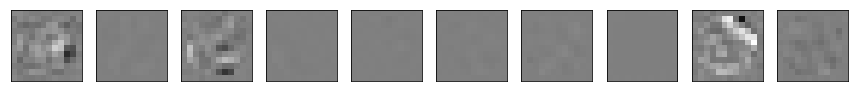

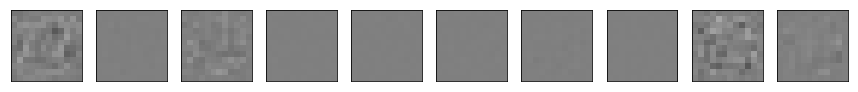

average of data patches =  -7.100443737628172e-05 +/- 0.006574908718507028
average of residual patches =  -0.00012720371157388843 +/- 0.0011495734809430275
median energy of data =  0.01805433222943249
average energy of data =  0.030413328139507825 +/- 0.03819488457404461
average energy of residual =  0.013231501890949708 +/- 0.015538619597857871
median energy of residual =  0.009049602208440045
average gain of coding =  2.6775914269434495 +/- 0.9138115086027653
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.0022418373482855337
average std of codewords =  0.023478982350661152
l0-sparseness of codewords =  0.02829446774574669  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0014310059354996354


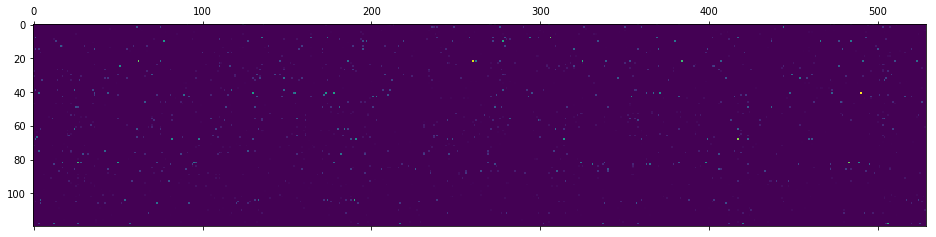

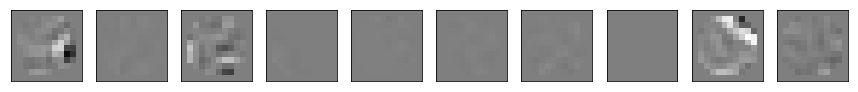

number of codes, size of reconstructed images =  (4096, 144)


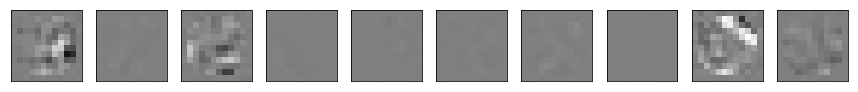

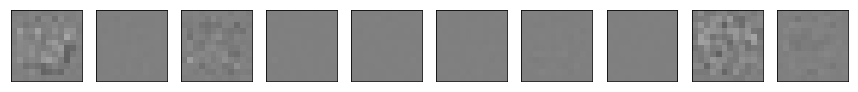

average of data patches =  -7.100443737628172e-05 +/- 0.006574908718507028
average of residual patches =  -1.5531221672691526e-05 +/- 0.0020344383644449243
median energy of data =  0.01805433222943249
average energy of data =  0.030413328139507825 +/- 0.03819488457404461
average energy of residual =  0.011549690754442728 +/- 0.01453372965804887
median energy of residual =  0.007333219444175351
average gain of coding =  3.012490454989645 +/- 1.0215420928555934


In [17]:
from shl_scripts.shl_encode import sparse_encode
sparse_code = {}
for homeo_method in homeo_methods:
    if dico[homeo_method].P_cum is None: 
        gain = np.ones(shl.n_dictionary)
    else:
        gain = None
    sparse_code[homeo_method] = sparse_encode(data[indx, :], dico[homeo_method].dictionary, 
                                 P_cum=dico[homeo_method].P_cum, l0_sparseness = shl.l0_sparseness, C=C, gain=gain)
    SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code[homeo_method])

## measuring the distance to independance 

In [18]:
#fig, ax= plt.subplots(figsize=(13, 5))
for homeo_method in homeo_methods:
    MI = get_MI(sparse_code[homeo_method])
    print ('Mutual information for homeo_method=', homeo_method, 'is', MI)


Mutual information for homeo_method= HAP is 1.3018994083245792
Mutual information for homeo_method= None is 0.8040471582552977


In [19]:
shl.l0_sparseness/shl.n_dictionary

0.02835538752362949

## Version used

In [20]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
pandas 0.22.0
Fri Feb 23 20:39:24 2018 CET